In [1]:
import os
import sys
sys.path.append(os.pardir)
import numpy as np
from convert import nh9_to_array


hsi_path = '../sample/sample_hsi.nh9'

hsi_array = nh9_to_array(hsi_path)
hsi_array = hsi_array / 4096
print(hsi_array.shape)

(1080, 2048, 151)


In [2]:
from convert import extract_pixels_from_hsi, extract_pixels_from_hsi_mask

hs_array = extract_pixels_from_hsi(hsi_array, np.array((100, 100, 200, 200)))
print(hs_array.shape)

(10000, 151)


### plot_spectral_graph()
HS画素の平均をプロット

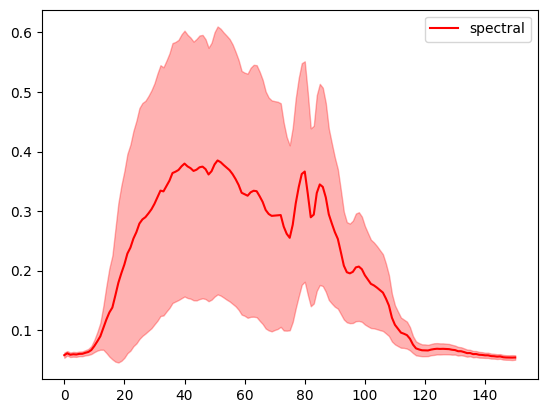

In [3]:
import matplotlib.pyplot as plt
from visualize import plot_spectral_graph

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax = plot_spectral_graph(hs_array, ax, plot_color='red', label = 'spectral', plot_std=True)
fig.show()

### plot_spectrals_graph()
複数のHS画素の平均をプロット

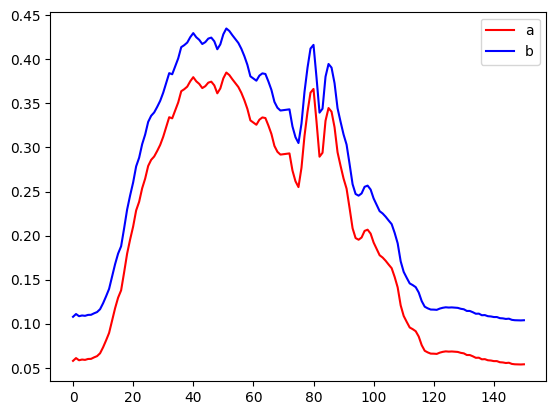

In [4]:
from visualize import plot_spectrals_graph
hspixels_list = []
color_list = []
label_list = []

hspixels_list.append(hs_array)
hspixels_list.append(hs_array + 0.05)
color_list.append('red')
color_list.append('blue')
label_list.append('a')
label_list.append('b')

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax = plot_spectrals_graph(hspixels_list, ax, plot_color_list=color_list, label_list=label_list)
fig.show()

### set_grath_spectralscale()
スペクトルの尺度でx軸を設定

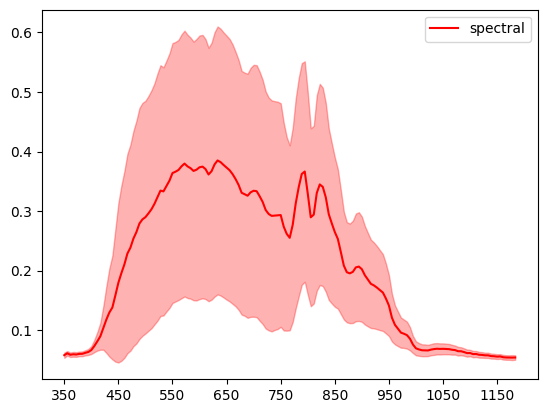

In [5]:
from visualize import set_grath_spectralscale

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax = plot_spectral_graph(hs_array, ax, plot_color='red', label = 'spectral', plot_std=True)
ax = set_grath_spectralscale(ax)
fig.show()

### 使用方法

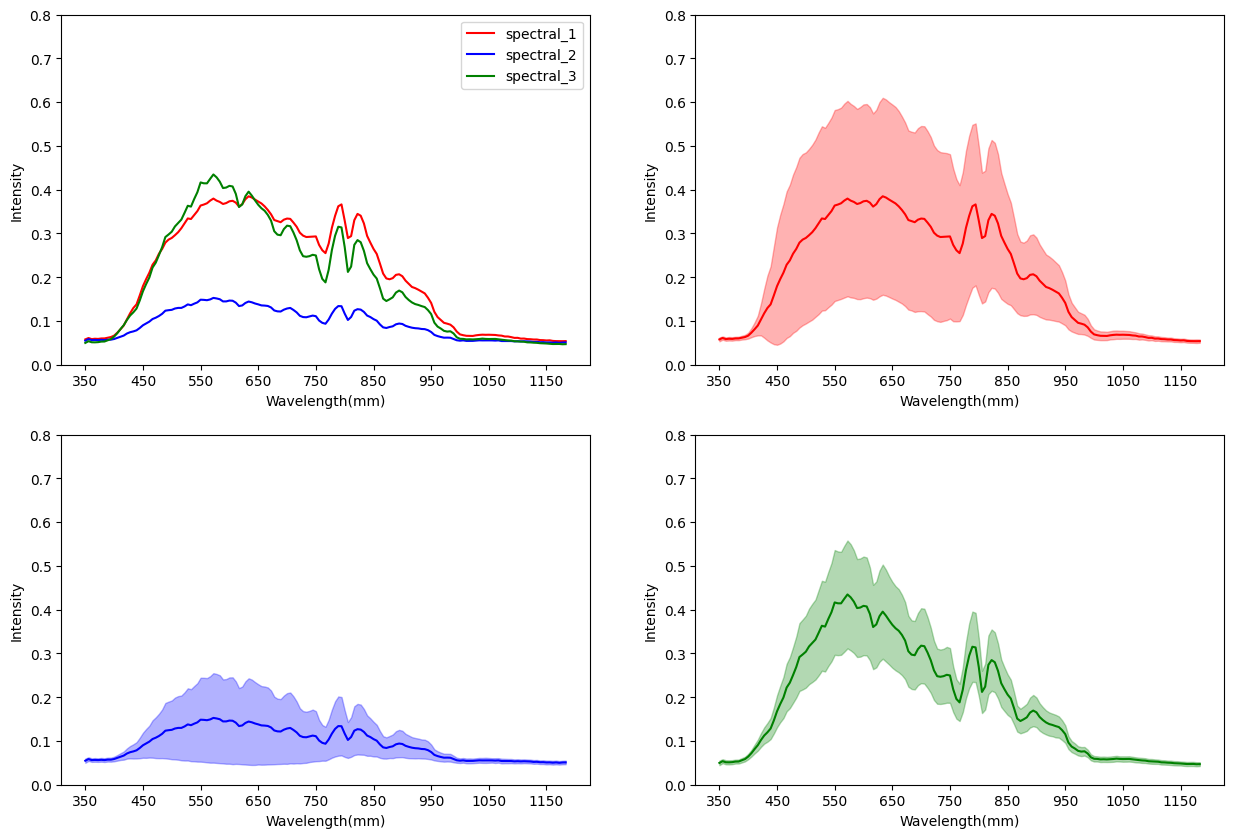

In [6]:
# データの用意
hspixels_list = []
color_list = []
label_list = []
hspixel_1 = extract_pixels_from_hsi(hsi_array, np.array((100, 100, 200, 200)))
hspixel_2 = extract_pixels_from_hsi(hsi_array, np.array((700, 700, 800, 800)))
hspixel_3 = extract_pixels_from_hsi(hsi_array, np.array((400, 1500, 500, 1600)))
hspixels_list.append(hspixel_1)
hspixels_list.append(hspixel_2)
hspixels_list.append(hspixel_3)
color_list.append('red')
color_list.append('blue')
color_list.append('green')
label_list.append('spectral_1')
label_list.append('spectral_2')
label_list.append('spectral_3')

# 図の作成
fig = plt.figure(figsize=(15, 10))
ax = fig.add_subplot(2, 2, 1)
ax = plot_spectrals_graph(hspixels_list, ax, plot_color_list=color_list, label_list=label_list)
ax = set_grath_spectralscale(ax)
ax.set_xlabel('Wavelength(mm)')
ax.set_ylabel('Intensity')
ax.set_ylim(0, 0.8)
for i in range(3):
    ax = fig.add_subplot(2, 2, i+2)
    ax = plot_spectral_graph(hspixels_list[i], ax, plot_color=color_list[i], plot_std=True)
    ax = set_grath_spectralscale(ax)
    ax.set_xlabel('Wavelength(mm)')
    ax.set_ylabel('Intensity')
    ax.set_ylim(0, 0.8)
fig.show()